In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [82]:
# Load the CSV file
file_path = 'recipes_data.csv'  # replace with your file path
df = pd.read_csv(file_path, nrows=10000)

# Display the column names and first 5 rows
print("Column Names:")
print(df.columns)

print("\nFirst 5 Rows:")
print(df.head())

Column Names:
Index(['title', 'ingredients', 'directions', 'link', 'source', 'NER', 'site'], dtype='object')

First 5 Rows:
                   title                                        ingredients  \
0    No-Bake Nut Cookies  ["1 c. firmly packed brown sugar", "1/2 c. eva...   
1  Jewell Ball'S Chicken  ["1 small jar chipped beef, cut up", "4 boned ...   
2            Creamy Corn  ["2 (16 oz.) pkg. frozen corn", "1 (8 oz.) pkg...   
3          Chicken Funny  ["1 large whole chicken", "2 (10 1/2 oz.) cans...   
4   Reeses Cups(Candy)    ["1 c. peanut butter", "3/4 c. graham cracker ...   

                                          directions  \
0  ["In a heavy 2-quart saucepan, mix brown sugar...   
1  ["Place chipped beef on bottom of baking dish....   
2  ["In a slow cooker, combine all ingredients. C...   
3  ["Boil and debone chicken.", "Put bite size pi...   
4  ["Combine first four ingredients and press in ...   

                                              link    source  \


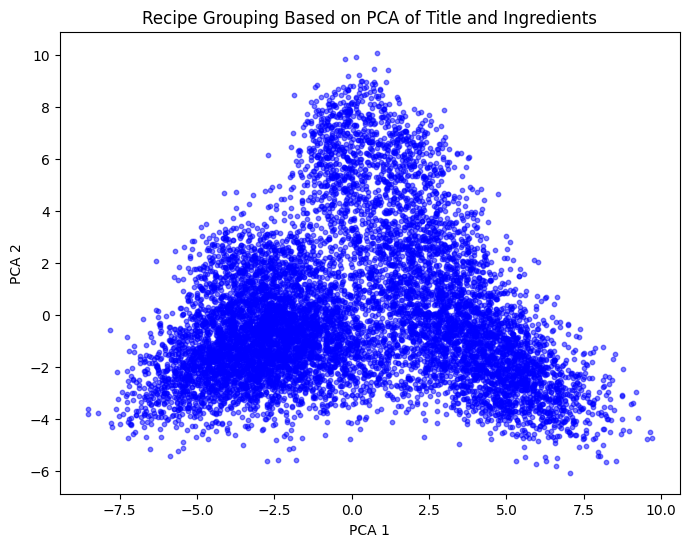

In [83]:
# Combine title and ingredients into a single text field for analysis
df['text'] = df['title'] + " " + df['ingredients'] + " " + df["directions"]

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the 'text' column into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Standardize the TF-IDF matrix
scaler = StandardScaler(with_mean=False)  # With mean=False to handle sparse matrix
tfidf_matrix_scaled = scaler.fit_transform(tfidf_matrix.toarray())

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(tfidf_matrix_scaled)

# Create a new DataFrame with PCA results
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Plot the PCA result to visualize the grouping
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c='blue', alpha=0.5, s=10)
plt.title('Recipe Grouping Based on PCA of Title and Ingredients')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Setting the number of clusters to 2.
You can see that most savoury dishes are lebelled 1 and desserts labelled as 0.


Clustered Recipes (first 20 rows):
                               title  cluster
0                No-Bake Nut Cookies        0
1              Jewell Ball'S Chicken        1
2                        Creamy Corn        1
3                      Chicken Funny        1
4               Reeses Cups(Candy)          0
5           Cheeseburger Potato Soup        1
6                Rhubarb Coffee Cake        0
7                     Scalloped Corn        1
8               Nolan'S Pepper Steak        1
9                    Millionaire Pie        0
10             Double Cherry Delight        0
11                     Buckeye Candy        0
12              Quick Barbecue Wings        1
13               Taco Salad Chip Dip        1
14      Pink Stuff(Frozen Dessert)          0
15              Fresh Strawberry Pie        0
16        Easy German Chocolate Cake        0
17                    Broccoli Salad        1
18               Strawberry Whatever        0
19  Eggless Milkless Applesauce Cake        

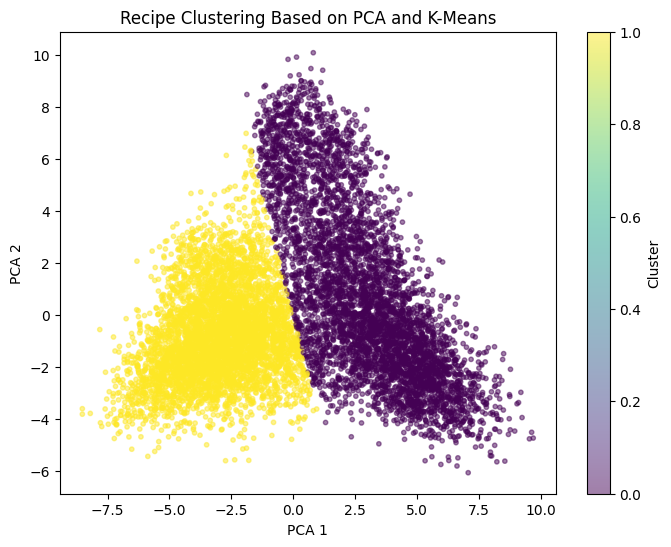

In [84]:
# Apply K-Means clustering to the PCA result
kmeans = KMeans(n_clusters=2, random_state=42)  # Setting n_clusters to 9 based on your observation
df['cluster'] = kmeans.fit_predict(pca_result)

# Display the first 5 rows with cluster labels
print("\nClustered Recipes (first 20 rows):")
print(df[['title', 'cluster']].head(20))

# Visualize the clusters in the PCA space
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df['cluster'], cmap='viridis', alpha=0.5, s=10)
plt.title('Recipe Clustering Based on PCA and K-Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [85]:
# Filter and display all recipes from a particular cluster (e.g., cluster 0)
cluster_to_view = 0  # Change this to any cluster number you want to see
recipes_in_cluster = df[df['cluster'] == cluster_to_view]

# Print out all the recipes in the chosen cluster
print(f"\nTop 20 Recipes in Cluster {cluster_to_view}:")
print(recipes_in_cluster[['title', 'cluster']].head(20))


Top 20 Recipes in Cluster 0:
                                                title  cluster
0                                 No-Bake Nut Cookies        0
4                                Reeses Cups(Candy)          0
6                                 Rhubarb Coffee Cake        0
9                                     Millionaire Pie        0
10                              Double Cherry Delight        0
11                                      Buckeye Candy        0
14                       Pink Stuff(Frozen Dessert)          0
15                               Fresh Strawberry Pie        0
16                         Easy German Chocolate Cake        0
18                                Strawberry Whatever        0
19                   Eggless Milkless Applesauce Cake        0
20  Grandma Hanrath'S Banana Breadfort Collins, Co...        0
21                             Chocolate Frango Mints        0
24                            Prize-Winning Meat Loaf        0
27                       

More advanced clustering where number of clusters is 1000


Clustered Recipes (first 20 rows):
                               title  cluster
0                No-Bake Nut Cookies       21
1              Jewell Ball'S Chicken       17
2                        Creamy Corn       13
3                      Chicken Funny       17
4               Reeses Cups(Candy)         25
5           Cheeseburger Potato Soup        2
6                Rhubarb Coffee Cake        7
7                     Scalloped Corn       37
8               Nolan'S Pepper Steak       24
9                    Millionaire Pie       40
10             Double Cherry Delight       40
11                     Buckeye Candy       25
12              Quick Barbecue Wings        6
13               Taco Salad Chip Dip       47
14      Pink Stuff(Frozen Dessert)         40
15              Fresh Strawberry Pie        4
16        Easy German Chocolate Cake       22
17                    Broccoli Salad       26
18               Strawberry Whatever       10
19  Eggless Milkless Applesauce Cake       1

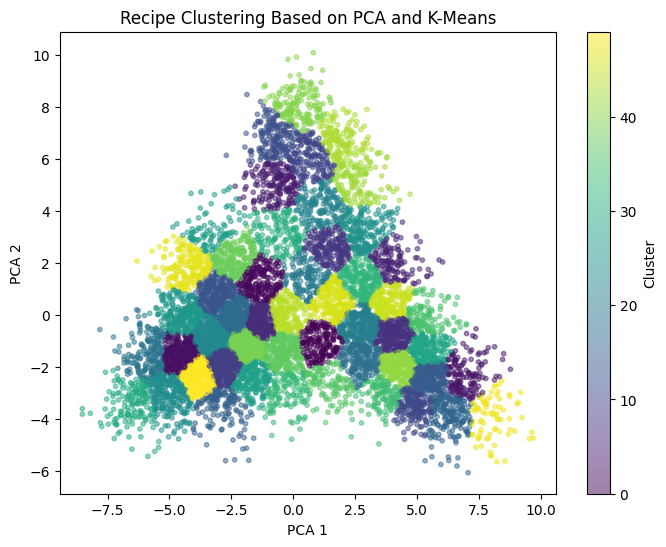

In [86]:
# Apply K-Means clustering to the PCA result
kmeans = KMeans(n_clusters=50, random_state=42)  # Setting n_clusters to 9 based on your observation
df['cluster'] = kmeans.fit_predict(pca_result)

# Display the first 5 rows with cluster labels
print("\nClustered Recipes (first 20 rows):")
print(df[['title', 'cluster']].head(20))

# Visualize the clusters in the PCA space
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df['cluster'], cmap='viridis', alpha=0.5, s=10)
plt.title('Recipe Clustering Based on PCA and K-Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [97]:
# Filter and display all recipes from a particular cluster (e.g., cluster 0)
cluster_to_view = 27  # Change this to any cluster number you want to see
recipes_in_cluster = df[df['cluster'] == cluster_to_view]

# Print out all the recipes in the chosen cluster
print(f"\nAll Recipes in Cluster {cluster_to_view}:")
print(recipes_in_cluster[['title', 'cluster']])


All Recipes in Cluster 27:
                                                  title  cluster
142                                            Dill Dip       27
280                                       24 Hour Salad       27
345                         Lemon Jello Vegetable Salad       27
424                                Fresh Broccoli Salad       27
683                         Wedding Bell Lemonade Punch       27
...                                                 ...      ...
9401                  Tomato Soup And Cream Cheese Mold       27
9552                               1000 Island Dressing       27
9603                                      Lettuce Salad       27
9638                     Fruited Chicken And Rice Salad       27
9879  Cream Cheese Caviar Spread(Serve With Red Wine...       27

[92 rows x 2 columns]


In [88]:
# Filter and display all recipes from a particular cluster (e.g., cluster 0)
cluster_to_view = 25  # Change this to any cluster number you want to see
recipes_in_cluster = df[df['cluster'] == cluster_to_view]

# Print out all the recipes in the chosen cluster
print(f"\nAll Recipes in Cluster {cluster_to_view}:")
print(recipes_in_cluster[['title', 'cluster']])


All Recipes in Cluster 25:
                                       title  cluster
4                       Reeses Cups(Candy)         25
11                             Buckeye Candy       25
21                    Chocolate Frango Mints       25
27                                Easy Fudge       25
99                              Brickle Bars       25
...                                      ...      ...
9737                    Creme De Menthe Bars       25
9750                   Chocolate Fudge Candy       25
9754                 Chocolate Coconut Drops       25
9761                       Chocolate Dessert       25
9983  Aunt Jeanette'S Fast Cherry Crumb Cake       25

[189 rows x 2 columns]


In [103]:
# Select a recipe title to find similar recipes within its cluster
selected_recipe = 'No-Bake Chocolate Peanut Butter Cookies'  # Replace with the title of a recipe from your dataset

# Find the cluster of the selected recipe
selected_recipe_cluster = df.loc[df['title'] == selected_recipe, 'cluster'].values[0]

# Filter recipes in the same cluster
recipes_in_cluster = df[df['cluster'] == selected_recipe_cluster]

# Get the top 5 recipes (or fewer if there are less than 5) from the same cluster
top_5_recipes_in_cluster = recipes_in_cluster.head(5)

# Print out all the recipes in the same cluster
# print(f"\nAll Recipes in Cluster {selected_recipe_cluster}:")
# print(recipes_in_cluster[['title', 'cluster']])

# Print the top 5 recipes from the same cluster
print(f"\nTop 5 Recipes similar to '{selected_recipe}' (cluster {selected_recipe_cluster}):")
print(top_5_recipes_in_cluster[['title', 'cluster']])


Top 5 Recipes similar to 'No-Bake Chocolate Peanut Butter Cookies' (cluster 21):
                   title  cluster
0    No-Bake Nut Cookies       21
42        Angel Biscuits       21
44           Fruit Pizza       21
162     Sweet Potato Pie       21
167         Banana Bread       21


# Cosine Similarity

In [89]:
# Compute cosine similarity matrix from the TF-IDF features
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Convert the similarity matrix to a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df['title'], columns=df['title'])

# Display the top-left corner of the similarity matrix
print("\nTop-left corner of Cosine Similarity Matrix:")
print(cosine_sim_df.iloc[:10, :10])


Top-left corner of Cosine Similarity Matrix:
title                     No-Bake Nut Cookies  Jewell Ball'S Chicken  \
title                                                                  
No-Bake Nut Cookies                  1.000000               0.011727   
Jewell Ball'S Chicken                0.011727               1.000000   
Creamy Corn                          0.050761               0.044276   
Chicken Funny                        0.083775               0.342722   
Reeses Cups(Candy)                   0.051679               0.012824   
Cheeseburger Potato Soup             0.129008               0.165500   
Rhubarb Coffee Cake                  0.092429               0.036158   
Scalloped Corn                       0.119689               0.075039   
Nolan'S Pepper Steak                 0.045886               0.027667   
Millionaire Pie                      0.075854               0.019079   

title                     Creamy Corn  Chicken Funny  Reeses Cups(Candy)    \
title      

In [90]:
# Select a recipe title to find similar recipes
selected_recipe = 'No-Bake Chocolate Peanut Butter Cookies'  # Replace with the title of a recipe from your dataset

# Get similarity scores for the selected recipe
similarity_scores = cosine_sim_df.loc[selected_recipe]

# Sort recipes by similarity score (highest first)
most_similar_recipes = similarity_scores.sort_values(ascending=False)

# Display the top 5 most similar recipes
print(f"\nTop 5 Recipes Similar to '{selected_recipe}':")
print(most_similar_recipes[1:6])  # Exclude the first recipe (itself)


Top 5 Recipes Similar to 'No-Bake Chocolate Peanut Butter Cookies':
title
Fudge Cookies (No Bake)      0.750494
No Bake Cookies              0.657833
Chocolate Oatmeal Cookies    0.642107
Preacher'S Cookies           0.636764
No Bake Cookies              0.632996
Name: No-Bake Chocolate Peanut Butter Cookies, dtype: float64


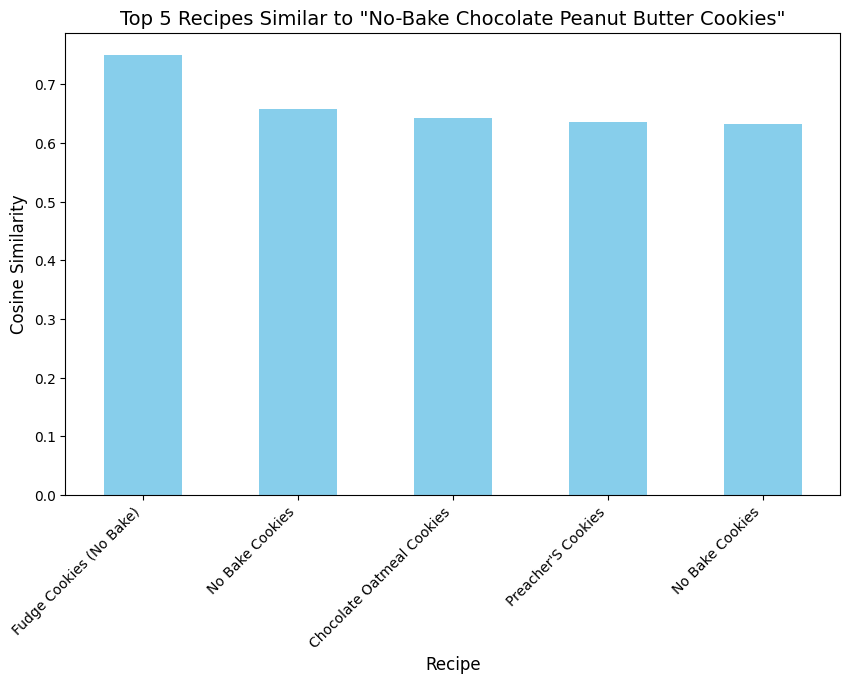

In [ ]:
# Select a recipe title to find similar recipes
selected_recipe = 'No-Bake Chocolate Peanut Butter Cookies'  # Replace with the title of a recipe from your dataset

# Get similarity scores for the selected recipe
similarity_scores = cosine_sim_df.loc[selected_recipe]

# Sort recipes by similarity score (highest first)
most_similar_recipes = similarity_scores.sort_values(ascending=False)

# Get the top 5 most similar recipes (exclude the first one, which is the recipe itself)
top_5_recipes = most_similar_recipes[1:6]

# Plotting the results
plt.figure(figsize=(10, 6))
top_5_recipes.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title(f'Top 5 Recipes Similar to "{selected_recipe}"', fontsize=14)
plt.xlabel('Recipe', fontsize=12)
plt.ylabel('Cosine Similarity', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate recipe titles for better visibility
plt.show()

Cosine similarity provides better results in comparison to clustering.